<span style="font-size: 15px;">
 ----------------------------------------------------------------- <br>
 Project: House Prices Prediction <br>
 Author: Jairo Macedo <br>
 Created: June 2024 <br>
 Last Modified: [04, 2025] | By: Jairo Macedo <br>
 ----------------------------------------------------------------- <br>
 Description: <br>
 This Python notebook contains the code and analysis for the project <br>
 "House Prices Prediction". The goal is to model and predict house prices <br>
 using a variety of property features. The dataset comes from a Kaggle <br>
 competition and includes rich details about homes and their sale prices. <br>
 ----------------------------------------------------------------- <br>
 The analysis is structured as follows: <br>
 1. Data Import and Exploration: Loading and understanding the dataset. <br>
 2. Feature Engineering: Creating and selecting relevant variables. <br>
 3. Modeling: Applying and tuning machine learning models to predict prices. <br>
 4. Evaluation: Assessing model performance and accuracy. <br>
 5. Submission: Preparing results for Kaggle submission. <br>
 ----------------------------------------------------------------- <br>

<br>
<b>Clean Dataset Files</b> <br>
- <code>train_2.csv</code> – The cleaned and preprocessed training set <br>
- <code>test_2.csv</code> – The cleaned and preprocessed test set <br>
</span>



# Packages ⚙️ and data 🗂️

In [ ]:
# ================================
# Data Handling and Utilities
# ================================
import pandas as pd                      # Data manipulation
import numpy as np                       # Numerical operations
import zipfile                           # Reading compressed .zip files
import math                              # Basic math functions

from support import zip_path             # Path to the .zip file
from support import path         # Path for saving results
from support import plot_categorical_boxplots  # Custom plotting function
from support import plot_comp_histogram_boxplot  # Custom plotting function

# ================================
# Visualization
# ================================
import matplotlib.pyplot as plt          # Plotting
import seaborn as sns                    # Statistical data visualization

# ================================
# Machine Learning Models
# ================================
from sklearn.model_selection import train_test_split   # Train/test split
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn import tree                               # Decision Tree Regressor
from sklearn.neighbors import KNeighborsRegressor      # KNN Regressor

# ================================
# Model Evaluation Metrics
# ================================
from sklearn.metrics import mean_absolute_error        # MAE
from sklearn.metrics import mean_squared_error         # MSE
from sklearn.metrics import r2_score                   # R²

# ================================
# Aesthetics
# ================================
# Custom color (dark wine red)
red_color = (162 / 255, 37 / 255, 56 / 255)









import os

In [2]:
# Setting the global random seed for reproducibility
np.random.seed(42)

In [3]:
df_train = pd.read_csv(os.path.join(path, 'Data', 'train_2.csv'))
df_test = pd.read_csv(os.path.join(path, 'Data', 'test_2.csv'))

# Exploratory

In [7]:
# Checking the cardinality of the data
df_train.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

In [8]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
plot_comp_histogram_boxplot(
    df_train,
    coluna="SalePrice",
    intervalos=30,
    figsize=(6,3),

    box_facecolor=red_color, 
    box_edgecolor=red_color, 
    box_linewidth=1,
    fliersize=3,

    color_mean="red",
    color_mediana="grey",
    color_moda="blue",
    stat_linewidth=2.5,
    legend_loc="upper right"
)


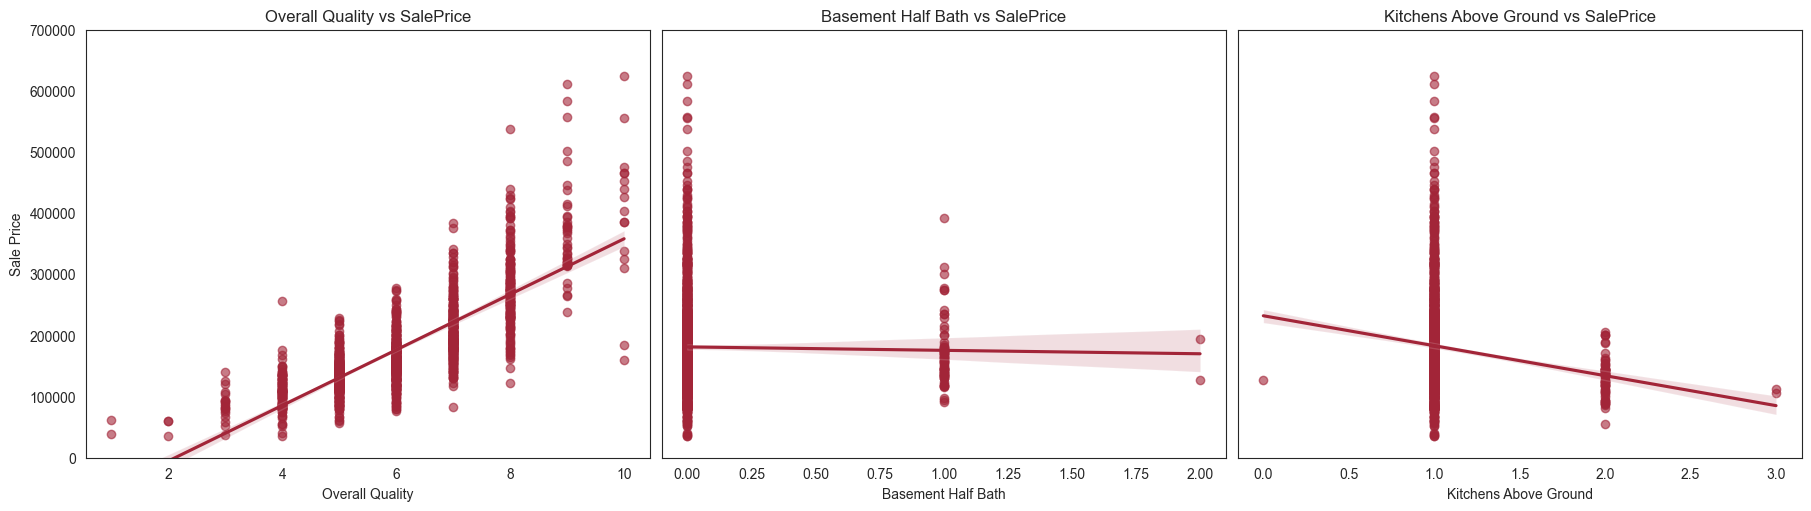

In [78]:
# Custom wine red color
wine_red = (162 / 255, 37 / 255, 56 / 255)

# Remove seaborn grid style
sns.set_style("white")

# Criando os subplots
fig, ax = plt.subplots(ncols=3, figsize=(18, 5), constrained_layout=True)

features = ['OverallQual', 'BsmtHalfBath', 'KitchenAbvGr']
titles = ['Overall Quality', 'Basement Half Bath', 'Kitchens Above Ground']

for i in range(3):
    sns.regplot(
        data=df_train,
        x=features[i],
        y='SalePrice',
        ax=ax[i],
        scatter_kws={'alpha': 0.6, 'color': wine_red},
        line_kws={'color': wine_red},  # Ainda aparece a linha de tendência
    )
    ax[i].set_title(f'{titles[i]} vs SalePrice', fontsize=12)
    ax[i].set_xlabel(titles[i])
    ax[i].set_ylabel('Sale Price' if i == 0 else '')
    ax[i].set_ylim(0, 700000)
    ax[i].grid(False)  # Remove grid
    if i > 0:
        ax[i].set_yticklabels([])

plt.show()



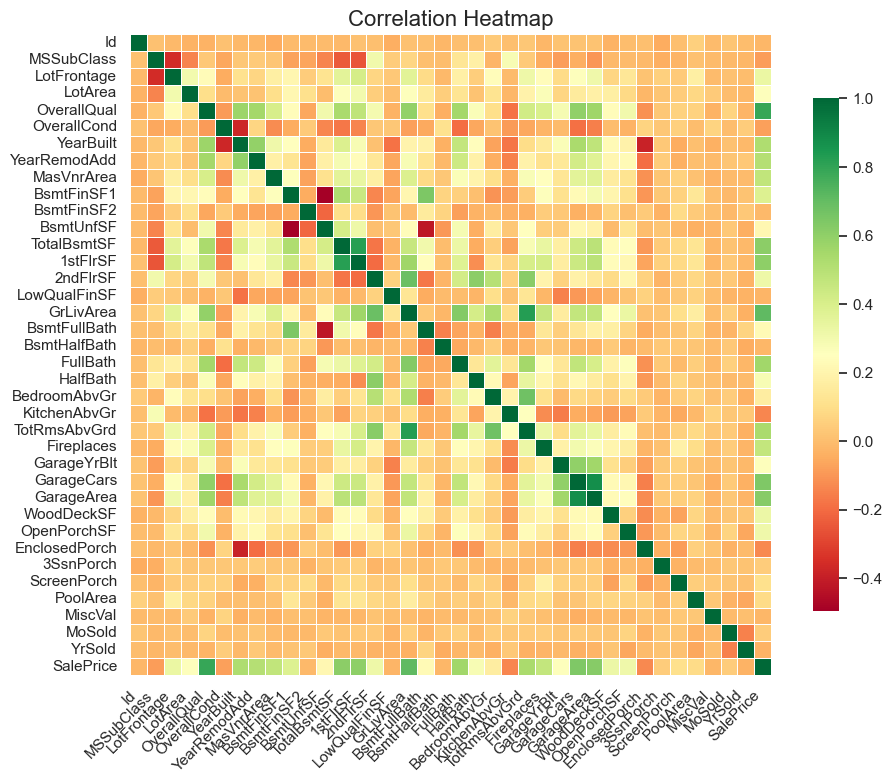

In [87]:
# Select only numerical columns
corr_matrix = df_train.select_dtypes(include='number').corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    cmap='RdYlGn',
    annot=False,        # Display correlation values
    fmt=".2f",         # Number format
    linewidths=0.5,    # Lines between cells
    square=True,
    cbar_kws={'shrink': 0.8},  # Smaller color bar
    ax=ax
)

ax.set_title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()